# Predictive Analysis For Customer Rentention At Vodafone

Objective:
The objective of this project is to utilize machine-learning models within the CRISP-DM framework to predict customer churn at Vodafone Corporation. Identify key indicators of churn and propose effective retention strategies based on the analysis. Compile findings into a comprehensive presentation for the business development unit, emphasizing actionable insights to enhance customer retention efforts.



Hypothesis
In this section we stated our null and alternate hypothesis as well as the questions that we seek to answer.


**Null Hypothesis (H₀):** There is no significant association between a customer's tenure and the likelihood of churn.

**Alternative Hypothesis (H₁):** A customer's tenure is significantly associated with the likelihood of churn, suggesting that longer tenure reduces the probability of churn.

Analytical Questions:
1. What is our Churning rate?
2. What type of contract churns more customers?
3. What type of internet service churns more customers?
4. Which gender Churns more?
5. What is the longest period of time we have had a customer?
6. What is the relationship between tenure and Churn?

# Set Up

**Installation**

Here is the section where we installed all the packages/libraries that will be needed to tackle the challenge.

In [8]:
#Installatin of packages
#!pip install numpy
#!pip install pandas
#!pip install patool
#!pip install forex_python
#!pip install pandas_profiling

## Importations

In [9]:
# import necessary librairies for this project
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# Machine learning libraries and metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Other packages
import os
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.pipeline import Pipeline

Establishing a Connection To SQL Sever

In [10]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [11]:
# Get the values for the credentials you set in the '.env' file

server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
database = environment_variables.get("DATABASE")

In [12]:
# creating a connection
connection_string = "DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3"

In [13]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

Data Loading From Various Sources

In [14]:
# load data from server 
query = ('SELECT* FROM LP2_Telco_churn_first_3000;')
first_data = pd.read_sql(query, connection)
first_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [15]:
# check the data info
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [16]:
# Replace with the correct relative path to your file
xlsx_file_path = "C:/Users/ALFRED/OneDrive/GitHub/LP2_Project_Churn/Telco-churn-second-2000.xlsx"

# Load the Excel file into a pandas DataFrame
second_data = pd.read_excel(xlsx_file_path)

# Display the first few rows of the DataFrame
second_data.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [17]:
# check the data info
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


Perform an Exploratory Data Analysis (EDA)

In [18]:
#perform an Exploratory Data Analysis (EDA) on the provided dataset
# Display basic information about the dataset
first_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [19]:
#Check the data shape
first_data.shape

(3000, 21)

The data above has 3000 rows and 21 columns.

In [20]:
# Check for missing values
first_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [21]:
#Checking for NaN values
first_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

The data above appear to have NaN values 

In [22]:
# Display data types of all columns
print(first_data.dtypes)

customerID           object
gender               object
SeniorCitizen          bool
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       bool
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [23]:
# Display basic information about the dataset
second_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [24]:
#Check the data shape
second_data.shape

(2000, 20)

The data above has 2043 rows and 21 columns.

In [25]:
# Check for missing values
second_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [26]:
# Display data types of all columns
print(second_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object


In [27]:
#Checking for NaN values
second_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

The data above does not appear to have NaN values.

In [28]:
# Assuming first_data and second_data are your DataFrames
# Concatenate along rows (vertically)
concatenated_data = pd.concat([first_data, second_data], axis=0)

# Resetting the index after concatenation
concatenated_data.reset_index(drop=True, inplace=True)

# Display the concatenated DataFrame
concatenated_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.95,NaN
4996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.3,NaN
4997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.7,NaN
4998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.35,NaN


# Standardizing all cloumns in the concatenated df

In [29]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_partner = concatenated_data['Partner'].unique()
print(unique_values_partner)


[True False 'No' 'Yes']


In [30]:

# Standardizing the Partner column

# Replace True with 'Yes' and False with 'No'
concatenated_data['Partner'] = concatenated_data['Partner'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['Partner'].value_counts())



Partner
No     2594
Yes    2406
Name: count, dtype: int64


In [31]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_dependents = concatenated_data['Dependents'].unique()
print(unique_values_dependents)


[False True 'No' 'Yes']


In [32]:
# Standardizing the Dependents column

# Replace True with 'Yes' and False with 'No'
concatenated_data['Dependents'] = concatenated_data['Dependents'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['Dependents'].value_counts())

Dependents
No     3521
Yes    1479
Name: count, dtype: int64


In [33]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_phoneservice = concatenated_data['PhoneService'].unique()
print(unique_values_phoneservice)


[False True 'Yes' 'No']


In [34]:
# Standardizing the PhoneService column

# Replace True with 'Yes' and False with 'No'
concatenated_data['PhoneService'] = concatenated_data['PhoneService'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['PhoneService'].value_counts())

PhoneService
Yes    4538
No      462
Name: count, dtype: int64


In [35]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_multiplelines = concatenated_data['MultipleLines'].unique()
print(unique_values_multiplelines)


[None False True 'Yes' 'No' 'No phone service']


In [36]:
# Standardizing the MultipleLines column

# Replace True with 'Yes' and False with 'No'
concatenated_data['MultipleLines'] = concatenated_data['MultipleLines'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['MultipleLines'].value_counts())

MultipleLines
No                  2403
Yes                 2135
No phone service     193
Name: count, dtype: int64


In [37]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_internetservice = concatenated_data['InternetService'].unique()
print(unique_values_internetservice)


['DSL' 'Fiber optic' 'No']


In [38]:
# Standardizing the InternetService column

# Replace True with 'Yes' and False with 'No'
concatenated_data['InternetService'] = concatenated_data['InternetService'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['InternetService'].value_counts())

InternetService
Fiber optic    2191
DSL            1712
No             1097
Name: count, dtype: int64


In [39]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_onlinesecurity = concatenated_data['OnlineSecurity'].unique()
print(unique_values_onlinesecurity)


[False True None 'No' 'No internet service' 'Yes']


In [40]:
# Standardizing the OnlineSecurity column

# Replace True with 'Yes' and False with 'No'
concatenated_data['OnlineSecurity'] = concatenated_data['OnlineSecurity'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['OnlineSecurity'].value_counts())

OnlineSecurity
No                     2469
Yes                    1434
No internet service     446
Name: count, dtype: int64


In [41]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_deviceprotection = concatenated_data['DeviceProtection'].unique()
print(unique_values_deviceprotection)

[False True None 'No' 'No internet service' 'Yes']


In [42]:
# Standardizing the DeviceProtection column

# Replace True with 'Yes' and False with 'No'
concatenated_data['DeviceProtection'] = concatenated_data['DeviceProtection'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['DeviceProtection'].value_counts())

DeviceProtection
No                     2172
Yes                    1731
No internet service     446
Name: count, dtype: int64


In [43]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_techsupport = concatenated_data['TechSupport'].unique()
print(unique_values_techsupport)

[False True None 'No' 'No internet service' 'Yes']


In [44]:
# Standardizing the TechSupport column

# Replace True with 'Yes' and False with 'No'
concatenated_data['TechSupport'] = concatenated_data['TechSupport'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['TechSupport'].value_counts())

TechSupport
No                     2477
Yes                    1426
No internet service     446
Name: count, dtype: int64


In [45]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_streamingtv = concatenated_data['StreamingTV'].unique()
print(unique_values_streamingtv)

[False True None 'Yes' 'No internet service' 'No']


In [46]:
# Standardizing the StreamingTVcolumn

# Replace True with 'Yes' and False with 'No'
concatenated_data['StreamingTV'] = concatenated_data['StreamingTV'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['StreamingTV'].value_counts())

StreamingTV
No                     1982
Yes                    1921
No internet service     446
Name: count, dtype: int64


In [47]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_seniorcitizen = concatenated_data['SeniorCitizen'].unique()
print(unique_values_seniorcitizen)

[0 1]


In [48]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_streamingmovies = concatenated_data['StreamingMovies'].unique()
print(unique_values_streamingmovies)

[False True None 'No' 'No internet service' 'Yes']


In [49]:
# Standardizing the StreamingMovies column

# Replace True with 'Yes' and False with 'No'
concatenated_data['StreamingMovies'] = concatenated_data['StreamingMovies'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['StreamingMovies'].value_counts())

StreamingMovies
No                     1954
Yes                    1949
No internet service     446
Name: count, dtype: int64


In [50]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_paperlessbilling = concatenated_data['PaperlessBilling'].unique()
print(unique_values_paperlessbilling)

[True False 'Yes' 'No']


In [51]:
# Standardizing the PaperlessBilling column

# Replace True with 'Yes' and False with 'No'
concatenated_data['PaperlessBilling'] = concatenated_data['PaperlessBilling'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['PaperlessBilling'].value_counts())

PaperlessBilling
Yes    2951
No     2049
Name: count, dtype: int64


In [52]:
# Assuming concatenated_data is the name of your DataFrame
unique_values_churn = concatenated_data['Churn'].unique()
print(unique_values_churn)

[False True None nan]


In [53]:
# Standardizing the Churn column

# Replace True with 'Yes' and False with 'No'
concatenated_data['Churn'] = concatenated_data['Churn'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['Churn'].value_counts())

Churn
No     2219
Yes     780
Name: count, dtype: int64


In [54]:
# Understanding the numerical columns further
concatenated_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5000.000000,5000.000000,5000.000000
mean,0.159600,32.257600,64.781770
std,0.366271,24.635483,30.141924
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,35.487500
50%,0.000000,29.000000,70.400002
75%,0.000000,55.250000,89.949997
max,1.000000,72.000000,118.750000


In [55]:
# Check for duplicates
concatenated_data.duplicated().sum()

0

In [56]:
concatenated_data.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

In [57]:
# Convert TotalChares to Float
#concatenated_data = Convert 'TotalCharges' column to float
concatenated_data['TotalCharges'] = pd.to_numeric(concatenated_data['TotalCharges'], errors='coerce')

# Display the DataFrame after conversion
concatenated_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.950000,NaN
4996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.300000,NaN
4997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.700000,NaN
4998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.350000,NaN


In [58]:
#Checking if TotalCharges datatype has change to float 
print(concatenated_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


The above shows that the TotalCharge is changed from object to float

## Univariate Data Analysis

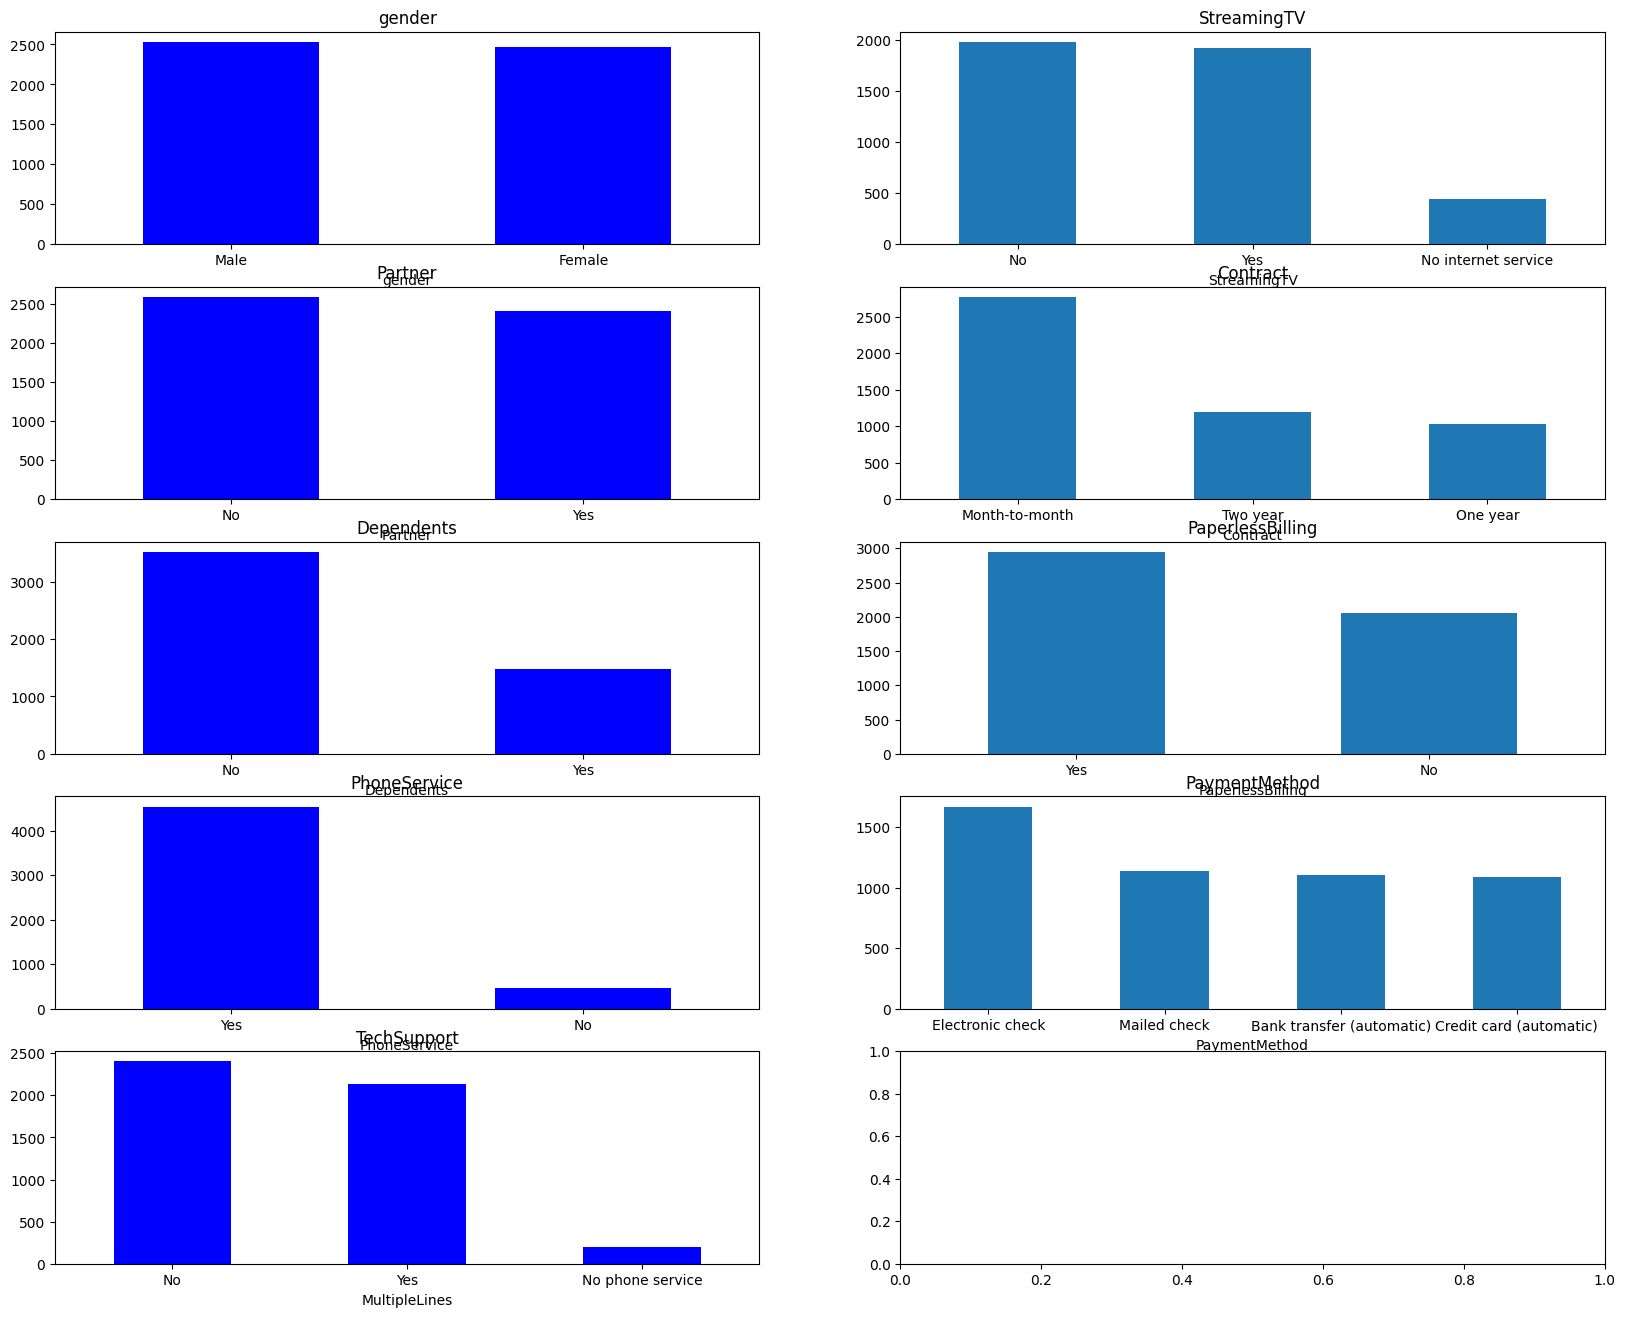

In [59]:
# Distribution of Categorical coulmns
Categorical_columns = concatenated_data[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod']]
fig, axes = plt.subplots(nrows = 5,ncols = 2, figsize = (20,16),squeeze=False)



for i, feature in enumerate(Categorical_columns):
    if i < 5:
        ax = concatenated_data[feature].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color='blue')
    
   
    elif i >=10 and i < 15:
        ax = concatenated_data[feature].value_counts().plot(kind = 'bar',ax=axes[i-10,1],rot = 0)

    ax.set_title(feature)

## Multi variate Data Analysis

In [60]:
# Convert categorical columns to numeric using label encoding
concatenated_data['customerID'] = concatenated_data['customerID'].astype('category').cat.codes


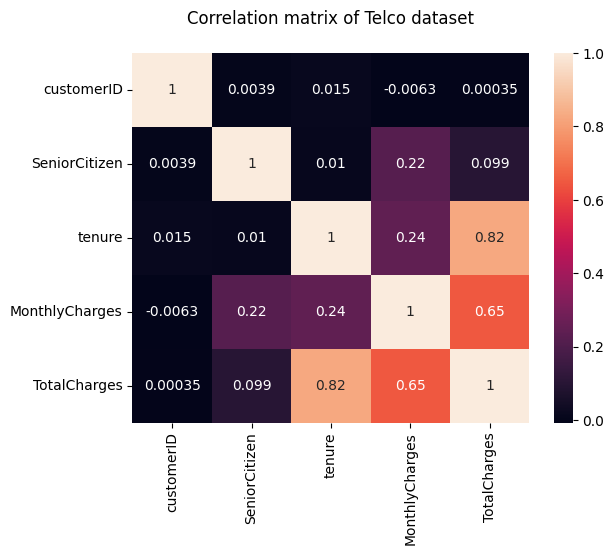

In [61]:
# Finding the correlation among the numeric variables.
numeric_columns = concatenated_data.select_dtypes(include='number')
correlation = numeric_columns.corr()

# Plotting the heatmap
heatmap = sns.heatmap(correlation, annot=True, annot_kws={'size': 10})
heatmap.set_title("Correlation matrix of Telco dataset\n")
plt.show()

# Answering the questions.

1. What is our churn rate?

In [62]:
churn_rate = concatenated_data.groupby(['Churn'])['customerID'].count().reset_index()
churn_rate.sort_values(['customerID'], ascending = True, inplace=True)
churn_rate

,Churn,customerID
1,Yes,780
0,No,2219


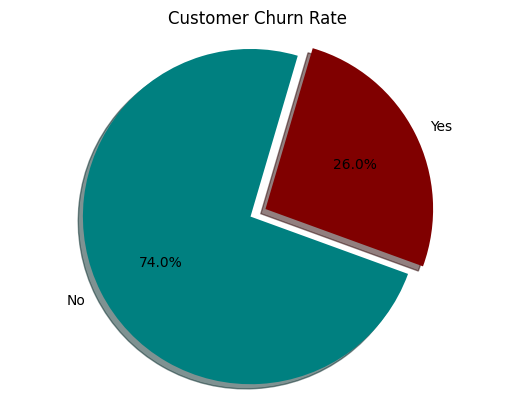

In [63]:
churn_rate_graph = churn_rate['customerID']
mycolors = ['maroon', 'teal']
myexplode = (0, 0.1)
plt.pie(churn_rate_graph, labels=churn_rate['Churn'],autopct='%1.1f%%', startangle=-20, shadow=True, colors=mycolors, explode=myexplode)
plt.title('Customer Churn Rate')
plt.axis('equal')
plt.show()

From the figure above, our churn rate is 26.0%

2. What type of contract churns more customers?

In [64]:
Contract_df = concatenated_data[['Contract','Churn']].copy()
Contract_df

,Contract,Churn
0,Month-to-month,No
1,One year,No
2,Month-to-month,Yes
3,One year,No
4,Month-to-month,Yes
...,...,...
4995,Month-to-month,NaN
4996,Two year,NaN
4997,Month-to-month,NaN
4998,One year,NaN


In [65]:
contact_churn_count= Contract_df.groupby("Contract")["Churn"].value_counts().unstack()
contact_churn_count

Churn,No,Yes
Contract,,
Month-to-month,940,701
One year,544,69
Two year,735,10


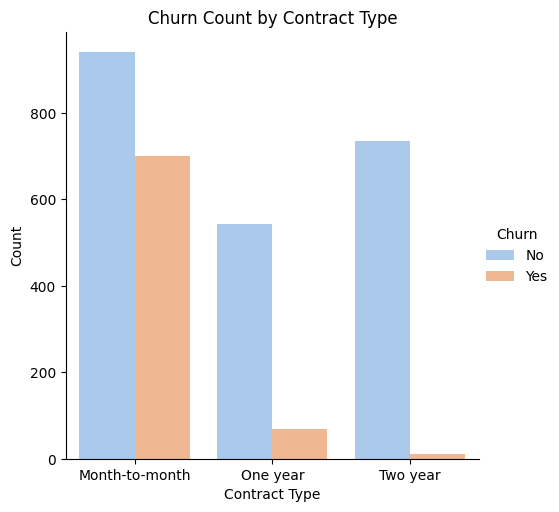

In [66]:
# Create a count plot using seaborn
sns.catplot(x="Contract", hue="Churn", kind="count", palette="pastel", data=Contract_df)

# Set the title and labels
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')

# Show the plot
plt.show()


From the above Chart, we can infer that customers with month-to-month contracts exhibit the highest churn, while those with two-year contracts experience the lowest churn.

3. What type of internet service churns more customers?

In [67]:
internet_service_counts= concatenated_data.groupby(['InternetService','Churn']).size().unstack()
internet_service_counts

Churn,No,Yes
InternetService,,
DSL,835,171
Fiber optic,772,570
No,612,39


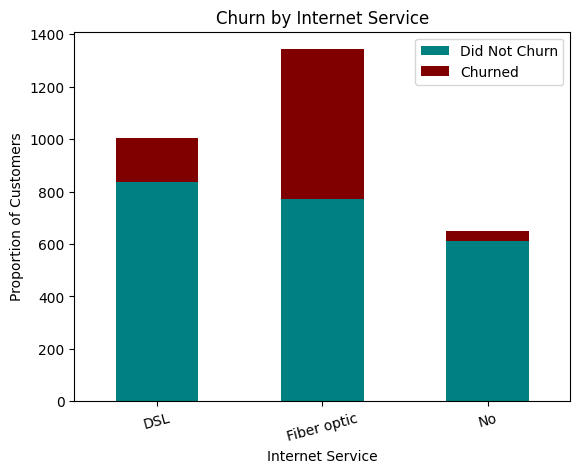

In [68]:
internet_service_counts.plot(kind='bar', stacked=True, color=['teal','maroon'],rot=15)
plt.xlabel('Internet Service')
plt.ylabel('Proportion of Customers')
plt.title('Churn by Internet Service')
plt.legend(['Did Not Churn', 'Churned'])

The above chart describe customers utilizing fiber optic internet service experienced an elevated churn rate.

4. Which gender churns more?

In [69]:
#count the number of males
gender_counts = concatenated_data['gender'].value_counts()
num_males=gender_counts['Male']
f'The total number of Males is {num_males}'

'The total number of Males is 2533'

In [70]:
#count the number of females
num_females=gender_counts['Female']
f'The total number of Females is {num_females}'

'The total number of Females is 2467'

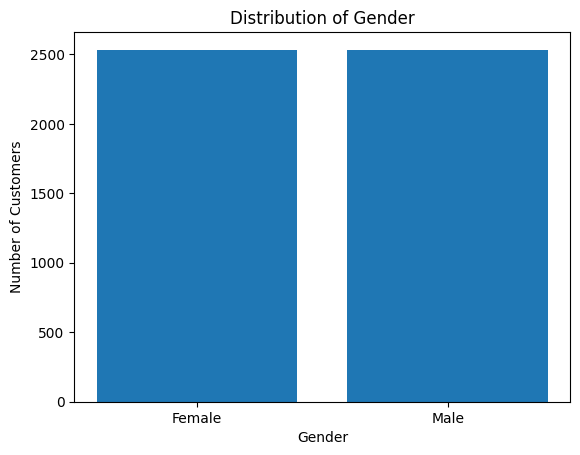

In [71]:
# Generate a bar chart to illustrate the findings.
labels = ['Female', 'Male']
values = [len(concatenated_data) - num_females, num_males]
plt.bar(labels, values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [72]:
# finding the number of  customers who churn and did not by gender
gender= concatenated_data.groupby("gender")["Churn"].value_counts().unstack()
gender

Churn,No,Yes
gender,,
Female,1079,384
Male,1140,396


In [73]:
# calculating the ratio of yes to no by gender 
gender['ratio'] = gender['Yes'] / gender['No']
gender

Churn,No,Yes,ratio
gender,,,
Female,1079,384,0.355885
Male,1140,396,0.347368


In [74]:
mean_ratio_by_gender = gender.groupby('gender')['ratio'].mean()
mean_ratio_by_gender

gender
Female    0.355885
Male      0.347368
Name: ratio, dtype: float64

In [75]:
f'The average ratio of males to females who churned is slightly greater than that of males.'

'The average ratio of males to females who churned is slightly greater than that of males.'

5. What is the longest period of time we have had a customer?

In [76]:
max_tenure = concatenated_data["tenure"].max()


f'The longest period we have retained a customer is {max_tenure} months'

'The longest period we have retained a customer is 72 months'

6. What is the relationship between tenure and churn?

In [77]:
churn_by_tenure = concatenated_data.sort_values('tenure', ascending=False)
churn_by_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
759,2863,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),90.349998,6563.399902,No
2615,4663,Female,0,No,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),91.349998,6697.200195,No
763,630,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),66.849998,4758.799805,No
2326,1104,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),109.150002,7789.600098,No
193,4854,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.699997,8129.299805,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1527,Male,0,No,Yes,0,Yes,No,No,None,...,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
488,2205,Female,0,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
3331,3862,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,NaN,NaN
1082,2158,Male,0,Yes,Yes,0,Yes,Yes,No,None,...,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No


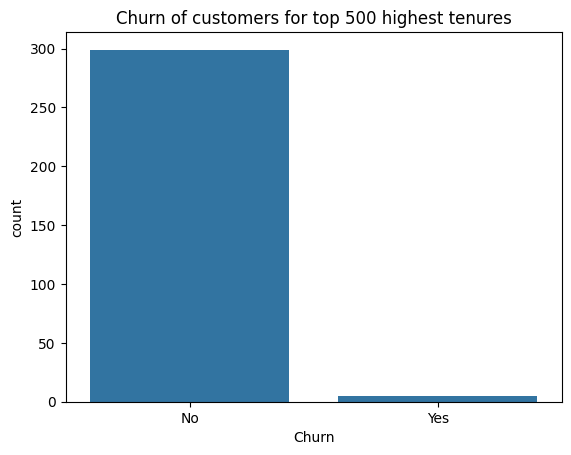

In [78]:

import seaborn as sns
import matplotlib.pyplot as plt

# Rest of your code...

# Churn by highest tenure
plt.title('Churn of customers for top 500 highest tenures')
sns.countplot(x='Churn', data=churn_by_tenure.head(500))
plt.show()


<Axes: title={'center': 'Churn of customers for bottom 500 highest tenures'}, xlabel='Churn', ylabel='count'>

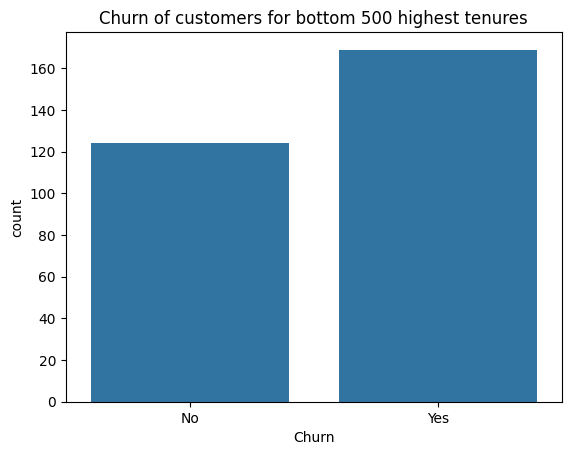

In [79]:
# Churn by lowest tenure
plt.title('Churn of customers for bottom 500 highest tenures')
sns.countplot(x ='Churn', data = churn_by_tenure.tail(500))

From above displayed, the longer the tenure of a customer the less likely they are to churn.

From our analysis, we fail to reject the Null Hypothesis; The longer a customer's tenure , the lesser the likelihood that the customer will churn.

# Feature Processing & Engineering

Here is the section to clean, process the dataset and create new features.

**Drop Duplicates**

In [80]:
duplicates = concatenated_data.duplicated()
print(concatenated_data[duplicates])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


There are no Duplicate rows

# Features Encoding

Using OneHot Encoder.

In [81]:
# Cleaning the categorical columns
concatenated_data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [82]:
concatenated_data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [83]:
concatenated_data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [84]:
concatenated_data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [85]:
concatenated_data['MultipleLines'].unique()

array([None, 'No', 'Yes', 'No phone service'], dtype=object)

In [86]:
concatenated_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [87]:
concatenated_data['OnlineSecurity'].unique()

array(['No', 'Yes', None, 'No internet service'], dtype=object)

In [88]:
concatenated_data['OnlineBackup'].unique()

array([True, False, None, 'No', 'No internet service', 'Yes'],
      dtype=object)

In [89]:
concatenated_data['DeviceProtection'].unique()

array(['No', 'Yes', None, 'No internet service'], dtype=object)

In [90]:
concatenated_data['TechSupport'].unique()

array(['No', 'Yes', None, 'No internet service'], dtype=object)

In [91]:
concatenated_data['StreamingTV'].unique()

array(['No', 'Yes', None, 'No internet service'], dtype=object)

In [92]:
concatenated_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [93]:
concatenated_data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [94]:
concatenated_data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [95]:
#Converting churn and Paperless billing back to object

concatenated_data['Churn'] = concatenated_data['Churn'].replace([1], 'Yes')
concatenated_data['Churn'] = concatenated_data['Churn'].replace([0], 'No')


In [96]:
concatenated_data['PaperlessBilling'] = concatenated_data['PaperlessBilling'].replace([1], 'Yes')
concatenated_data['PaperlessBilling'] = concatenated_data['PaperlessBilling'].replace([0], 'No')

In [97]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5000 non-null   int16  
 1   gender            5000 non-null   object 
 2   SeniorCitizen     5000 non-null   int64  
 3   Partner           5000 non-null   object 
 4   Dependents        5000 non-null   object 
 5   tenure            5000 non-null   int64  
 6   PhoneService      5000 non-null   object 
 7   MultipleLines     4731 non-null   object 
 8   InternetService   5000 non-null   object 
 9   OnlineSecurity    4349 non-null   object 
 10  OnlineBackup      4349 non-null   object 
 11  DeviceProtection  4349 non-null   object 
 12  TechSupport       4349 non-null   object 
 13  StreamingTV       4349 non-null   object 
 14  StreamingMovies   4349 non-null   object 
 15  Contract          5000 non-null   object 
 16  PaperlessBilling  5000 non-null   object 


In [266]:
import pandas as pd


# Load the LP2 dataset for testing
Testing_data = pd.read_csv('LP2_Telco-churn-last-2000.csv')  

# Data Preprocessing

In [267]:
# For training data
X_train = concatenated_data.drop('Churn', axis=1)  
y_train = concatenated_data['Churn']

# For testing data (LP2 dataset)
X_test = Testing_data.drop('Churn', axis=1)  
y_test = Testing_data['Churn']


In [281]:
# Proceeding to encode using OneHotEncoder.
cat_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

num_columns = ['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']

In [283]:
# Encoder instance
from sklearn.preprocessing import OneHotEncoder

cat_encoder= OneHotEncoder(drop="first")

churn_encoded_data = cat_encoder.fit_transform(concatenated_data[cat_columns])
churn_encoded_data

<5000x35 sparse matrix of type '<class 'numpy.float64'>'
	with 43540 stored elements in Compressed Sparse Row format>

In [284]:
#Converting encoded array to df
churn_encoded_df = pd.DataFrame(churn_encoded_data.toarray(), columns=cat_encoder.get_feature_names_out(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']))

In [285]:
churn_encoded_df

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_None,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_None,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4998,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


# Feature Scaling

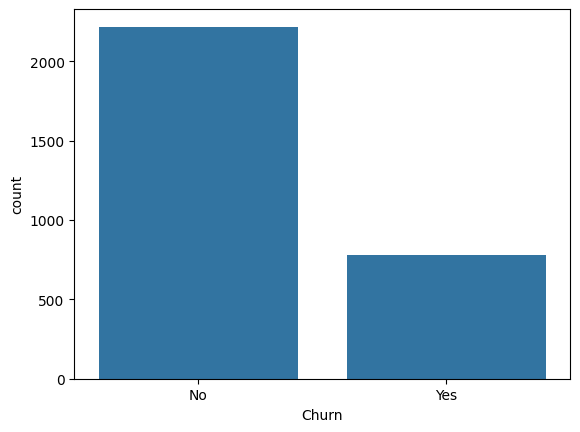

In [287]:
# Showing number of churned customers vs those who didn't
sns.countplot(x ='Churn', data = concatenated_data)
plt.show()

The dataset is imbalanced hence feature scaling is necessary.

In [288]:
# Instanciating the scaler.

scaler = StandardScaler()

In [289]:
# Fitting it to numerical columns.

churn_scaled_data = StandardScaler().fit_transform(concatenated_data[num_columns])

In [306]:
# Converting the array to a df.
columns = 'tenure','SeniorCitizen','MonthlyCharges','TotalCharges'
churn_scaled_df = pd.DataFrame(churn_scaled_data, columns=columns)

In [307]:
churn_scaled_df

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.268931,-0.435786,-1.159026,-0.989694
1,0.070734,-0.435786,-0.259856,-0.169993
2,-1.228335,-0.435786,-0.362713,-0.955181
3,0.517289,-0.435786,-0.745938,-0.191481
4,-1.228335,-0.435786,0.196365,-0.936007
...,...,...,...,...
4995,-1.025355,-0.435786,0.342356,-0.759121
4996,0.598481,-0.435786,0.307517,0.538256
4997,-1.228335,2.294704,-0.666307,-0.961550
4998,1.207420,2.294704,1.525212,2.106141


In [308]:
# Encoding the target column using label encoder.

le = LabelEncoder()
target = concatenated_data['Churn']
y_encoded = le.fit_transform(target)

In [309]:
y_encoded

array([0, 0, 1, ..., 3, 3, 3])

In [310]:
# Concatinating the numerical and categorical columns

churn_ready_df = pd.concat([churn_scaled_df,churn_encoded_df], axis=1)

In [311]:
churn_ready_df

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_None,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_None,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.268931,-0.435786,-1.159026,-0.989694,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.070734,-0.435786,-0.259856,-0.169993,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.228335,-0.435786,-0.362713,-0.955181,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.517289,-0.435786,-0.745938,-0.191481,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.228335,-0.435786,0.196365,-0.936007,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.025355,-0.435786,0.342356,-0.759121,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,0.598481,-0.435786,0.307517,0.538256,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4997,-1.228335,2.294704,-0.666307,-0.961550,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4998,1.207420,2.294704,1.525212,2.106141,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


# Dataset Splitting

In this section we split our dataset to train,eval and test sets.

In [319]:
import numpy as np

# Assuming y is a NumPy array
class_distribution = np.bincount(y)
print(class_distribution)


[2219  780    1 2000]


In [324]:

from sklearn.model_selection import StratifiedKFold

# Assuming X and y are your feature matrix and target variable
X = churn_ready_df
y = y_encoded

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the data
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Your modeling and evaluation code here
    # ...

# Continue with your model training and evaluation
 

In [325]:
X_train.shape

(4000, 39)

In [326]:
X_test.shape

(1000, 39)

In [327]:
X_eval.shape

(1000, 39)

In [328]:
y_train.shape

(4000,)

In [329]:
y_test.shape

(1000,)

In [330]:
y_eval.shape

(800,)

# Modelling

In this section we train, evaluate an test our selected models using our different datasets. We then compare each models peformance.

**Feature Selection**

In [334]:
# Train a Random Forest classifier

from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can use 'mean', 'median', 'most_frequent', or a constant value

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Now, X_train_imputed has no missing values, and you can use it to train your RandomForestClassifier
rf_model.fit(X_train_imputed, y_train)



RandomForestClassifier(random_state=42)

In [335]:
# Get the feature importance scores
importances = rf_model.feature_importances_

In [336]:
# Sort the features by importance score
sorted_indices = np.argsort(importances)[::-1]

In [337]:
# Print the feature ranking
print("Feature ranking:")
for i in sorted_indices:
    print(f"{i+1}. Feature {i} ({importances[i]:.4f})")

Feature ranking:
17. Feature 16 (0.1994)
21. Feature 20 (0.1500)
4. Feature 3 (0.0775)
3. Feature 2 (0.0759)
20. Feature 19 (0.0689)
1. Feature 0 (0.0625)
31. Feature 30 (0.0218)
28. Feature 27 (0.0180)
26. Feature 25 (0.0168)
32. Feature 31 (0.0160)
19. Feature 18 (0.0148)
27. Feature 26 (0.0147)
18. Feature 17 (0.0144)
12. Feature 11 (0.0136)
38. Feature 37 (0.0135)
5. Feature 4 (0.0126)
29. Feature 28 (0.0120)
16. Feature 15 (0.0117)
14. Feature 13 (0.0116)
36. Feature 35 (0.0111)
15. Feature 14 (0.0108)
35. Feature 34 (0.0106)
25. Feature 24 (0.0102)
6. Feature 5 (0.0101)
9. Feature 8 (0.0100)
11. Feature 10 (0.0095)
24. Feature 23 (0.0095)
13. Feature 12 (0.0094)
7. Feature 6 (0.0093)
30. Feature 29 (0.0089)
33. Feature 32 (0.0089)
2. Feature 1 (0.0088)
34. Feature 33 (0.0083)
22. Feature 21 (0.0079)
10. Feature 9 (0.0077)
37. Feature 36 (0.0068)
23. Feature 22 (0.0064)
39. Feature 38 (0.0062)
8. Feature 7 (0.0040)


In [338]:
# Select the top k features
k = 10
selected_features = sorted_indices[:k]
selected_features

array([16, 20,  3,  2, 19,  0, 30, 27, 25, 31], dtype=int64)

In [347]:
# Train a new classifier using only the selected features

from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_selected_imputed = imputer.fit_transform(X_train_selected)

# Train your RandomForestClassifier on the imputed data
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected_imputed, y_train)


RandomForestClassifier(random_state=42)

In [348]:
# making sure that the test set has the same columns as the training set before slicing it with selected_features
X_test_selected = X_test.iloc[:, selected_features]

In [350]:
# using X_test_selected to make predictions using your trained model:

from sklearn.impute import SimpleImputer

# Use the same imputer to transform your test set
X_test_selected_imputed = imputer.transform(X_test_selected)

# Now you can make predictions using your trained model
y_pred = rf_model_selected.predict(X_test_selected_imputed)


In [351]:
#classification report for your model's performance on the test set.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       443
           1       0.55      0.47      0.51       156
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00       400

    accuracy                           0.86      1000
   macro avg       0.59      0.58      0.59      1000
weighted avg       0.85      0.86      0.85      1000



**Random Forest Classifier**

In [352]:
# creating the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.set_params(**{'n_estimators': 100, 'random_state': 42})

RandomForestClassifier(random_state=42)

In [354]:
# Train the model on the training set

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Use SimpleImputer to fill missing values (NaN) with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')
X_train_selected_imputed = imputer.fit_transform(X_train_selected)

# Now you can train your RandomForestClassifier
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected_imputed, y_train)


RandomForestClassifier(random_state=42)

In [360]:
# Check if columns are consistent
if not X_train_selected.columns.equals(X_eval.columns):
    print("Columns in X_train_selected and X_eval are not the same.")


Columns in X_train_selected and X_eval are not the same.


In [362]:
# Fit the eval set with the same features as train set
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train_selected)

# Use the imputed data to train your model
rf_model_selected.fit(X_train_imputed, y_train)



RandomForestClassifier(random_state=42)

In [368]:
# Evaluate the Model on the Evaluation dataset 
# Example assuming X_train_selected has been used for training
assert X_eval_imputed.shape[1] == X_train_selected.shape[1], "Number of features does not match."



In [373]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

# Assuming X_train_selected and y_train are your training data
# Create and fit the HistGradientBoostingClassifier
hgb_clf = HistGradientBoostingClassifier(random_state=42)
hgb_clf.fit(X_train_selected, y_train)


HistGradientBoostingClassifier(random_state=42)

In [374]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [381]:
# Assuming you have already fitted the RandomForestClassifier and obtained y_pred

# Check the shape of y_eval and y_pred
print("Shape of y_eval:", y_eval.shape)
print("Shape of y_pred:", y_pred.shape)

# Verify the data splitting
# Print the first few elements of y_eval and y_pred for comparison
print("y_eval:", y_eval[:10])  # Adjust the range as needed
print("y_pred:", y_pred[:10])  # Adjust the range as needed

# Further analysis or debugging based on the printed information


Shape of y_eval: (800,)
Shape of y_pred: (1000,)
y_eval: [3 0 3 0 0 3 3 3 3 1]
y_pred: [0 0 0 0 1 0 0 0 0 1]


In [383]:
# Assuming y_pred is a NumPy array
y_pred = y_pred[:800]  # Keep only the first 800 samples

# Now, y_pred has 800 samples


In [384]:
print("Shape of y_eval:", y_eval.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_eval: (800,)
Shape of y_pred: (800,)


In [387]:
from sklearn.metrics import precision_score

# Assuming y_eval and y_pred are your true labels and predicted labels
precision_macro = precision_score(y_eval, y_pred, average='macro')

print("Precision (Macro):", precision_macro)

from sklearn.metrics import accuracy_score, f1_score, recall_score

# Assuming y_eval and y_pred are your true labels and predicted labels
accuracy = accuracy_score(y_eval, y_pred)
f1 = f1_score(y_eval, y_pred, average='macro')  # You can choose 'macro' or 'weighted' as well
recall = recall_score(y_eval, y_pred, average='macro')  # You can choose 'macro' or 'weighted' as well

print("Accuracy:", accuracy)
print("F1 Score (Macro):", f1)
print("Recall (Macro):", recall)



Precision (Macro): 0.321346263799094
Accuracy: 0.37625
F1 Score (Macro): 0.31997729921441737
Recall (Macro): 0.31949621242874465


In [389]:
# Fit the test set with the same features as train set
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Assuming X_test_selected is your input data
# Create an imputer and fit_transform your data
imputer = SimpleImputer(strategy='mean')  # You can choose another strategy
X_test_imputed = imputer.fit_transform(X_test_selected)

# Create and fit your RandomForestClassifier
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_test_imputed, y_test)


RandomForestClassifier(random_state=42)

In [392]:
from sklearn.impute import SimpleImputer


# Create an imputer and fit it on the training data
imputer = SimpleImputer(strategy='mean')  # You can choose another strategy
imputer.fit(X_train_selected)  # Use the training data to fit the imputer

# Transform your test data using the fitted imputer
X_test_imputed = imputer.transform(X_test_selected)

# Predict using the trained RandomForestClassifier
test_pred = rf_model_selected.predict(X_test_imputed)


In [393]:
test_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

In [395]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and test_pred are your true labels and predicted labels
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='macro')  # Choose the appropriate average setting
recall = recall_score(y_test, test_pred, average='macro')  # Choose the appropriate average setting
f1 = f1_score(y_test, test_pred, average='macro')  # Choose the appropriate average setting

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.999
Precision: 0.9994369369369369
Recall: 0.9983974358974359
F1 Score: 0.9989142925501256


**Gradient Boosting Classifier Model**

In [396]:
# Initialize the model with default hyperparameters
gbc = GradientBoostingClassifier(random_state=42)

In [398]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train and y_train are your training data and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer and transform your data
imputer = SimpleImputer(strategy='mean')  # You can choose another strategy
X_train_imputed = imputer.fit_transform(X_train)

# Create and fit the GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_imputed, y_train)

# Predict on the test set
X_test_imputed = imputer.transform(X_test)
test_pred = gbc.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, test_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.891


In [401]:
from sklearn.impute import SimpleImputer

# Assuming X_eval is your evaluation set
# Assuming 'mean' is the strategy you want to use for imputation
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data or a subset of it
imputer.fit(X_train)  # Assuming X_train is your training set

# Transform the evaluation set
X_eval_imputed = imputer.transform(X_eval)

# Now you can make predictions on the imputed evaluation set
y_pred = gbc.predict(X_eval_imputed)


In [402]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 3, 3, 1, 3, 0, 0, 1, 3,
       0, 1, 3, 0, 3, 1, 3, 1, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0,
       0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 1, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0,
       3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 0, 3, 0, 0, 1,
       3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 3, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 0, 3, 1, 0, 0, 3, 3, 3,
       0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 1, 3, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3,
       3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 1, 0, 0, 0,
       3, 3, 3, 0, 0, 3, 3, 1, 0, 3, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       1, 0, 3, 3, 0, 3, 0, 1, 1, 1, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 1, 0,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 1, 0, 3, 1, 1, 0, 0, 1, 0, 3,
       1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       1, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0,

In [406]:


# Assuming y_pred is a NumPy array or a list
y_pred_dropped = y_pred[:800]

# Now you can compute the classification report
classification_report(y_eval, y_pred_dropped)



'              precision    recall  f1-score   support\n\n           0       0.44      0.47      0.45       352\n           1       0.10      0.09      0.09       109\n           3       0.42      0.40      0.41       339\n\n    accuracy                           0.39       800\n   macro avg       0.32      0.32      0.32       800\nweighted avg       0.38      0.39      0.38       800\n'

In [408]:
from sklearn.metrics import classification_report

# Assuming y_pred is a NumPy array or a list
y_pred_dropped = y_pred[:800]

# Now you can compute the classification report
GB_CM = classification_report(y_eval[:800], y_pred_dropped)
print(GB_CM)


              precision    recall  f1-score   support

           0       0.44      0.47      0.45       352
           1       0.10      0.09      0.09       109
           3       0.42      0.40      0.41       339

    accuracy                           0.39       800
   macro avg       0.32      0.32      0.32       800
weighted avg       0.38      0.39      0.38       800



In [410]:
# Make predictions on an unkown dataset i.e. test

from sklearn.impute import SimpleImputer

# Assuming X_test is your test dataset
# Create a SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform the test data
X_test_imputed = imputer.fit_transform(X_test)

# Now you can make predictions on the imputed test set
test_pred = gbc.predict(X_test_imputed)


In [411]:
#classification report for the model's performance on the test set.
GBCM= (classification_report(y_test, test_pred))


print(GBCM)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       431
           1       0.72      0.57      0.64       167
           3       1.00      1.00      1.00       402

    accuracy                           0.89      1000
   macro avg       0.85      0.83      0.84      1000
weighted avg       0.89      0.89      0.89      1000



**Logistics Regression Model**

In [412]:
# Instanciate the model

lr = LogisticRegression(random_state=42)

In [414]:
# Train the model on the training set

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, and y_test are your training and test datasets
# Create a SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both the training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test_imputed)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       431
           1       0.72      0.62      0.67       167
           3       1.00      1.00      1.00       402

    accuracy                           0.90      1000
   macro avg       0.86      0.84      0.85      1000
weighted avg       0.89      0.90      0.89      1000



In [419]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Assuming X_eval is your dataset for evaluation
# Assuming lr is your trained Logistic Regression model
# Create a SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the evaluation data
X_eval_imputed = imputer.transform(X_eval)

# Make predictions using the logistic regression model
y_pred = lr.predict(X_eval_imputed)

# Print the predicted labels
print("Predicted Labels:", y_pred)


Predicted Labels: [0 0 0 0 0 0 0 1 0 1 1 0 1 1 3 3 1 3 0 0 1 3 0 1 3 0 3 1 3 1 0 0 3 3 0 0 3
 3 3 0 3 3 0 0 0 3 3 3 3 0 3 3 0 0 1 3 0 0 0 1 0 3 3 3 0 0 3 0 3 3 0 0 0 0
 1 0 0 0 1 3 3 3 3 0 3 0 0 0 3 3 3 0 0 0 0 3 0 3 0 0 0 1 0 3 0 0 0 0 3 0 0
 0 3 1 1 3 0 0 0 0 0 0 3 0 1 3 0 3 0 3 3 3 0 0 3 3 3 3 0 0 3 3 3 3 3 3 0 3
 0 0 0 3 3 3 0 1 0 0 3 0 1 3 0 0 1 3 0 0 3 0 3 1 0 3 0 3 3 3 0 0 3 0 0 0 0
 3 3 3 0 0 0 3 3 3 0 0 0 0 3 3 3 0 0 3 3 1 0 3 3 0 3 0 3 0 3 0 3 0 3 0 1 0
 3 3 0 3 0 1 1 1 0 3 0 3 0 3 3 0 0 3 1 0 3 3 0 0 0 0 0 3 3 3 0 0 1 0 3 1 0
 1 0 1 0 3 1 1 1 0 0 0 0 0 3 0 0 3 0 1 3 0 3 3 0 0 0 3 1 3 1 0 0 0 0 0 3 0
 0 0 3 0 0 1 3 1 0 3 3 0 1 0 3 3 0 3 1 0 0 0 3 3 3 3 1 3 0 1 0 1 3 3 3 0 3
 0 0 1 0 0 3 0 3 3 0 0 3 3 3 3 0 0 3 3 0 1 3 1 3 0 0 0 0 0 3 1 0 3 1 0 0 3
 3 3 0 0 0 3 3 0 0 3 3 3 0 0 0 1 3 0 0 0 0 3 3 0 0 1 0 1 3 3 0 3 0 0 3 0 0
 0 0 1 0 3 0 0 1 3 0 3 3 0 0 1 0 0 0 3 0 1 3 0 0 3 0 1 0 1 0 3 0 0 3 1 0 0
 0 0 1 3 0 0 1 3 3 1 3 0 0 0 3 0 0 0 0 3 0 3 0 3 3 3 0 0 0 0 1 0 0 0 1 1 3
 3 0 3 

In [424]:
#classification report for the model's performance on the eval set.

# Assuming y_pred is a NumPy array or a list
y_pred_dropped = y_pred[:800]

# Now you can compute the classification report
classification_report(y_eval, y_pred_dropped)


'              precision    recall  f1-score   support\n\n           0       0.44      0.46      0.45       352\n           1       0.09      0.09      0.09       109\n           3       0.42      0.40      0.41       339\n\n    accuracy                           0.38       800\n   macro avg       0.32      0.32      0.32       800\nweighted avg       0.38      0.38      0.38       800\n'

In [426]:
# Predicting on an unkown dataset

from sklearn.impute import SimpleImputer

# Assuming imputer is the imputer you used on your training data
X_test_imputed = imputer.transform(X_test)
test_pred = lr.predict(X_test_imputed)


In [427]:
#classification report for the model's performance on the test set.
LRM=(classification_report(y_test, test_pred))


print(LRM)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       431
           1       0.72      0.62      0.67       167
           3       1.00      1.00      1.00       402

    accuracy                           0.90      1000
   macro avg       0.86      0.84      0.85      1000
weighted avg       0.89      0.90      0.89      1000



# Models comparison

Creating a pandas dataframe that will allow us to compare our models.

In [428]:
models = []

In [429]:
models.append('RFC')

In [430]:
models.append('GBC')

In [431]:
models.append('LR')

In [464]:

metrics_list = [rfc_metrics, gbc_metrics, lr_metrics]


In [475]:

import pandas as pd

# Your list of DataFrames
list_of_dfs = [
    pd.DataFrame({
        'metric': [0.88, 0.86, 0.90],
        'model': ['RFC', 'RFC', 'RFC']
    }),
    pd.DataFrame({
        'metric': [0.67, 0.72, 0.62],
        'model': ['GBC', 'GBC', 'GBC']
    }),
    pd.DataFrame({
        'metric': [1.00, 1.00, 1.00],
        'model': ['LR', 'LR', 'LR']
    }),
    # Repeat the structure for the other two sets of DataFrames
]

# Concatenate the DataFrames along the rows
result_df = pd.concat(list_of_dfs, ignore_index=True)

# Display the resulting DataFrame
print(result_df)



   metric model
0    0.88   RFC
1    0.86   RFC
2    0.90   RFC
3    0.67   GBC
4    0.72   GBC
5    0.62   GBC
6    1.00    LR
7    1.00    LR
8    1.00    LR


In [477]:
print(metrics_df)

                                                   0  \
0    metric model
0   0.88   RFC
1   0.86   RFC
2...   
1    metric model
0   0.88   RFC
1   0.86   RFC
2...   
2    metric model
0   0.88   RFC
1   0.86   RFC
2...   

                                                   1  \
0    metric model
0   0.67   GBC
1   0.72   GBC
2...   
1    metric model
0   0.67   GBC
1   0.72   GBC
2...   
2    metric model
0   0.67   GBC
1   0.72   GBC
2...   

                                                   2  
0    metric model
0   1.00    LR
1   1.00    LR
2...  
1    metric model
0   1.00    LR
1   1.00    LR
2...  
2    metric model
0   1.00    LR
1   1.00    LR
2...  


# Hyper Parameter tuning.

Fine-tuning the Top-k models (3 < k < 5) using a GridSearchCV (that is in sklearn.model_selection ) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then comparing them again to select the best one.

In [478]:
models_trained = []

models_trained.append(rfc)

models_trained.append(gbc)

models_trained.append(lr)

In [479]:
print(models_trained[0].get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [480]:
# Getting the best hyper parameters

best_models_trained = []

**Hp tuning model #1**

In [481]:
models_trained[0]

RandomForestClassifier(random_state=42)

In [482]:
# Getting the best hyper parameters for RFC

models_trained[0].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [485]:
parameters = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [486]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[0],
    param_grid=parameters,
    scoring=['accuracy', 'f1', 'precision', 'recall'],
    refit='precision', 
    cv=10, 
    verbose=3 
)
     


In [488]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Create a simple example dataset
X, y = make_classification(n_samples=100, n_features=20, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'bootstrap': [True, False],  # Wrap the boolean value in a list
}

# Create the GridSearchCV object
searcher = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the model
searcher.fit(X, y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [489]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.406090,0.335371,0.130402,0.152737,True,None,50,"{'bootstrap': True, 'max_depth': None, 'n_esti...",0.90,0.95,0.85,0.95,0.95,0.92,0.040000,18
1,0.458128,0.041097,0.032631,0.012403,True,None,100,"{'bootstrap': True, 'max_depth': None, 'n_esti...",0.95,0.95,0.85,0.95,0.95,0.93,0.040000,4
2,0.972884,0.165471,0.055532,0.024411,True,None,200,"{'bootstrap': True, 'max_depth': None, 'n_esti...",0.95,0.95,0.85,0.95,0.95,0.93,0.040000,4
3,0.230810,0.016980,0.012035,0.006305,True,10,50,"{'bootstrap': True, 'max_depth': 10, 'n_estima...",0.90,0.95,0.90,0.95,0.95,0.93,0.024495,4
4,0.425225,0.022014,0.011760,0.008301,True,10,100,"{'bootstrap': True, 'max_depth': 10, 'n_estima...",0.90,1.00,0.85,0.95,0.95,0.93,0.050990,4
5,1.005897,0.173077,0.052014,0.004481,True,10,200,"{'bootstrap': True, 'max_depth': 10, 'n_estima...",0.95,0.95,0.85,0.95,0.95,0.93,0.040000,4
6,0.230489,0.003973,0.004517,0.006538,True,20,50,"{'bootstrap': True, 'max_depth': 20, 'n_estima...",0.95,0.95,0.85,0.95,0.95,0.93,0.040000,4
7,0.467161,0.018026,0.019549,0.007758,True,20,100,"{'bootstrap': True, 'max_depth': 20, 'n_estima...",0.95,0.95,0.90,0.95,0.95,0.94,0.020000,1
8,0.901542,0.016131,0.048513,0.010558,True,20,200,"{'bootstrap': True, 'max_depth': 20, 'n_estima...",0.95,0.95,0.85,0.95,0.95,0.93,0.040000,4
9,0.186589,0.015012,0.006803,0.006287,False,None,50,"{'bootstrap': False, 'max_depth': None, 'n_est...",0.95,0.95,0.90,0.95,0.95,0.94,0.020000,1


In [490]:
searcher.best_estimator_

RandomForestClassifier(max_depth=20)

In [491]:
best_models_trained.append(searcher.best_estimator_)